# Exploratory analysis

In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("loan_data_set.csv")

In [49]:
df.head() #look at few top rows using the fiunction head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
df.describe() # looks at the summary of the data (numerical columns)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
df['Property_Area'].value_counts() # we can look at the frequency distribution to understand whether they make sense or not

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

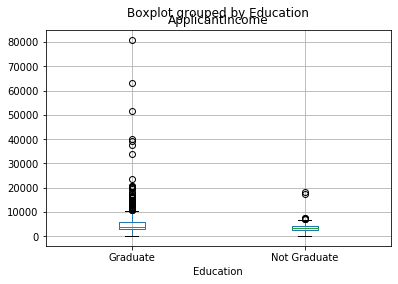

In [52]:
df.boxplot(column='ApplicantIncome', by = 'Education') #to understand the distribution

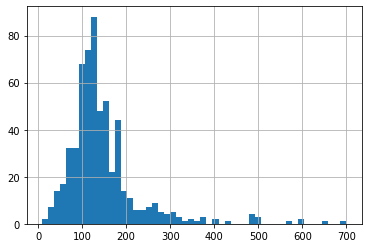

In [53]:
df['LoanAmount'].hist(bins=50) #there are some extreme values

In [54]:
#mavis beacon #tableau #other data science tools

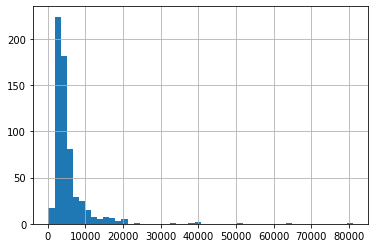

In [55]:
df['ApplicantIncome'].hist(bins=50) #has some extreme values

In [56]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\'nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64
'nProbability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


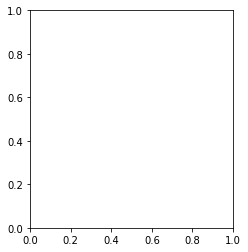

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

# DATA WRANGLING

In [58]:
df.apply(lambda x: sum(x.isnull()), axis=0) #number of missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
#filling missing values

In [60]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True) #filling missing values

In [62]:
print(df.mean()) #basic math operations ex. df.median, cumulative summation, etc

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64


In [63]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Building a Predictive Model in Python

In [64]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [65]:
# Extracting only the independent variables
print(df.head())
X = df.iloc[:, [8,10]].values #credit history and loan amount

#Extracting the dependent variables
y = df.iloc[:, 12].values #loan status

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [66]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [68]:
# Fitting Logistic Regression to training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [70]:
# Building the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8292682926829268

In [72]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [73]:
right = pd.DataFrame({'key': ['foo', 'bar', 'bar'], 'rval': [3, 4, 5]})
right

,key,rval
0,foo,3
1,bar,4
2,bar,5


In [74]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,3
1,bar,2,4
2,bar,2,5


In [75]:
one = pd.DataFrame(np.random.randn(5, 4))
one

,0,1,2,3
0,-1.846687,0.279688,2.024776,0.538802
1,1.836137,-2.371811,0.192645,-2.140590
2,-0.385492,-0.124966,-0.492677,2.150685
3,-0.125812,-0.823051,-0.136224,1.332348
4,-1.312281,0.027399,1.637404,0.548803


In [76]:
# show whether or not new customers will be granted a loan or not